In [17]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [18]:
warnings.filterwarnings('ignore')

### Mengimport Dataset

In [19]:
df = pd.read_csv("healthcare_dataset_stroke_data.csv")

### Menampilkan 10 Dataset Teratas

In [20]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [21]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Mengimport fungsi SimpleImputer dari sklearn

In [22]:
from sklearn.impute import SimpleImputer

### Substitusi Nilai NULL (SimpleImputer SKlearn)

In [23]:
simpleimputer = SimpleImputer(strategy = "mean")

In [24]:
df['bmi'] = simpleimputer.fit_transform(df[['bmi']])

In [25]:
print("Data setelah dilakukan cleaning")
df.isna().sum()

Data setelah dilakukan cleaning


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Data Scaling & Pembuatan Subset

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
df_subset = df[["age",'bmi']]

In [28]:
ss = StandardScaler()

In [29]:
x_scaled = ss.fit_transform(df_subset)

### Agglomerative Clustering - Scipy

In [30]:
from scipy.cluster.hierarchy import dendrogram,linkage

### Buat struktur hirarkinya

In [31]:
merge = linkage(x_scaled, method="ward")
merge

array([[1.00000000e+00, 1.89000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.70000000e+01, 3.27400000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.08000000e+02, 2.03300000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.02090000e+04, 1.02120000e+04, 4.17236930e+01, 2.03000000e+03],
       [1.02140000e+04, 1.02150000e+04, 6.50546924e+01, 3.08000000e+03],
       [1.02160000e+04, 1.02170000e+04, 9.27881566e+01, 5.11000000e+03]])

### Visualisasi

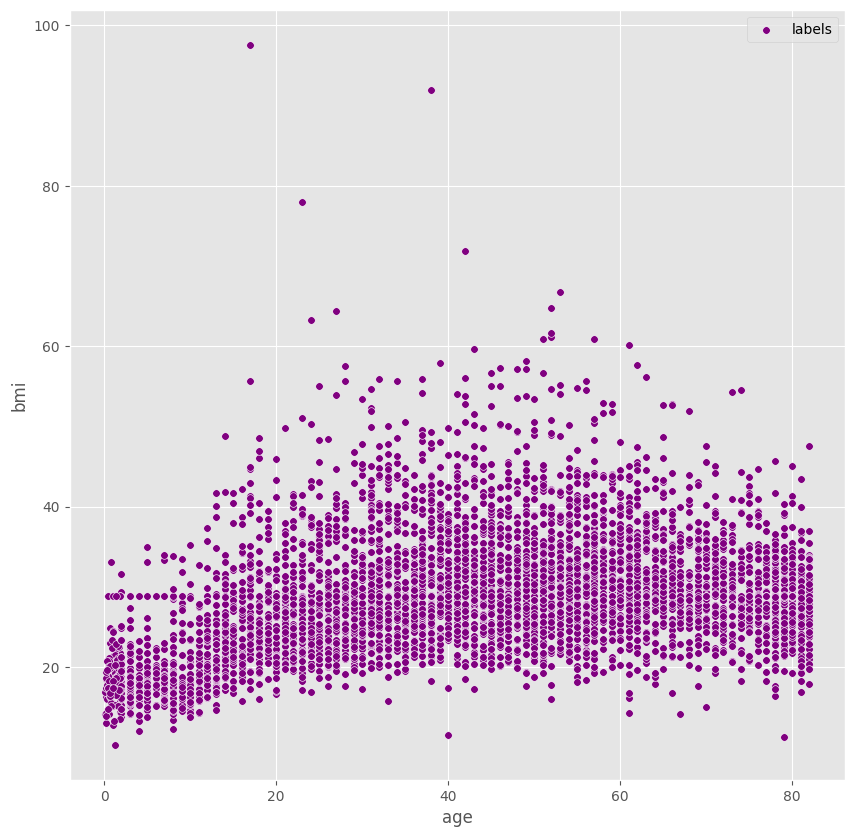

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))

sns.scatterplot(x = "age",
               y = "bmi",
               data = df_subset,
               s = 30, 
               c ='purple', 
               label="labels",
               )

plt.legend()
plt.show()